In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('spotify.csv')

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
#checking number of nulls (missing values)
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [7]:
df.shape

(32833, 23)

In [8]:
x =df[['danceability','track_popularity']]

In [9]:
x.head()

,danceability,track_popularity
0,0.748,66
1,0.726,67
2,0.675,70
3,0.718,60
4,0.650,69


In [10]:
x.shape

(32833, 2)

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    #init="k-means++": selects initial cluster centroids using sampling based on an empirical probability distribution of the points
    #centroids are selected where there are more points
    #One can use "random" initialization as well
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

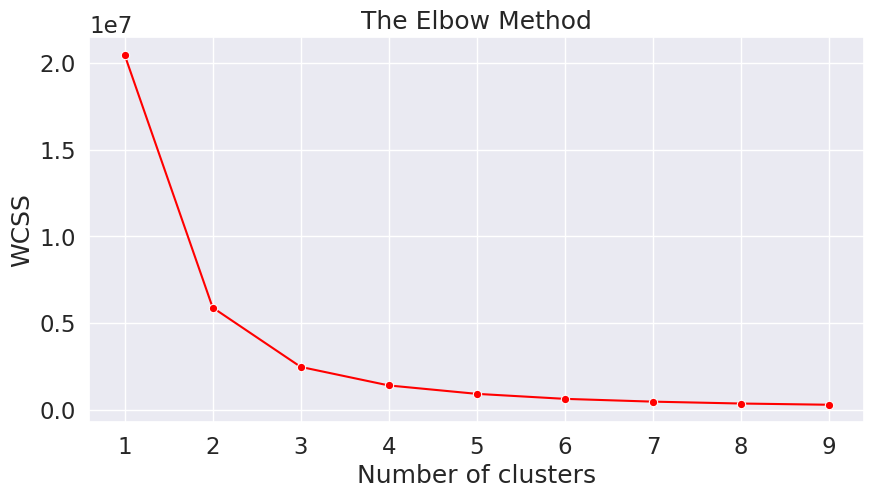

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 10), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# using only Age and income variable for easy visualisation
min_scal = MinMaxScaler()
X_scaled = min_scal.fit_transform(x)
X_scaled2 = pd.DataFrame(X_scaled, columns=['danceability','track_popularity'])

# Fitting K-Means to the dataset
kmeans_scaled = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

#init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia
#kmeans_scaled = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init=1)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

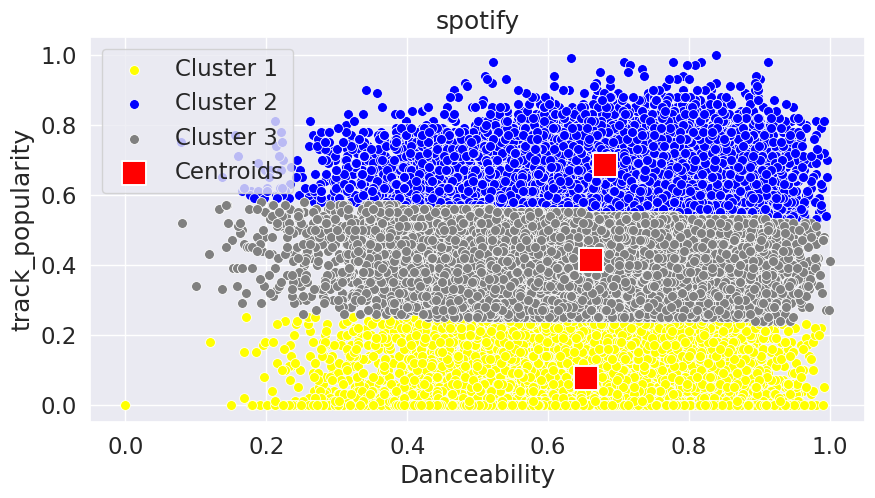

In [25]:
# Visualising the clusters
# Scaling of variables doesn't change the clutering but just the visualization
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 0, 0], y=X_scaled[y_kmeans_scaled == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 1, 0], y=X_scaled[y_kmeans_scaled == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 2, 0], y=X_scaled[y_kmeans_scaled == 2, 1], color = 'grey', label = 'Cluster 3',s=50)
#sns.scatterplot(x=X_scaled[y_kmeans_scaled == 3, 0], y=X_scaled[y_kmeans_scaled == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
#sns.scatterplot(x=X_scaled[y_kmeans_scaled == 4, 0], y=X_scaled[y_kmeans_scaled == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans_scaled.cluster_centers_[:, 0], y=kmeans_scaled.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(True)
plt.title('spotify')
plt.xlabel('Danceability')
plt.ylabel('track_popularity')
plt.legend()
plt.show()

In [26]:
labels_scaled = kmeans_scaled.labels_ # for each data point the assigned cluster (cluster number varies from 0 to 4)
centroids_scaled = kmeans_scaled.cluster_centers_ #Position of each centroid

In [27]:
x['cluster']=labels_scaled
x

,danceability,track_popularity,cluster
0,0.748,66,1
1,0.726,67,1
2,0.675,70,1
3,0.718,60,1
4,0.650,69,1
...,...,...,...
32828,0.428,42,2
32829,0.522,20,0
32830,0.529,14,0
32831,0.626,15,0


In [28]:
print(labels_scaled)

[1 1 1 ... 0 0 2]


In [29]:
centroids_scaled

array([[0.65339187, 0.07699245],
       [0.68121219, 0.6839604 ],
       [0.66064329, 0.4129611 ]])

In [30]:
x['cluster'].value_counts()

2    12717
1    11776
0     8340
Name: cluster, dtype: int64

# **Considering 3 variables**

In [31]:
y=df[['danceability','track_popularity','duration_ms']]

In [32]:
# using only Age and income variable for easy visualisation
min_scal = MinMaxScaler()
y_scaled = min_scal.fit_transform(y)
X_scaled2 = pd.DataFrame(y_scaled, columns=['danceability','track_popularity','duration_ms'])

# Fitting K-Means to the dataset
kmeans_scaled = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

#init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia
#kmeans_scaled = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init=1)
y_kmeans_scaled = kmeans_scaled.fit_predict(y_scaled)

In [33]:
labels_scaled3 = kmeans_scaled.labels_ # for each data point the assigned cluster (cluster number varies from 0 to 4)
centroids_scaled3 = kmeans_scaled.cluster_centers_ #Position of each centroid

In [34]:
print(labels_scaled3)

[2 2 2 ... 0 0 0]


In [35]:
centroids_scaled3

array([[0.65487498, 0.07970675, 0.46373077],
       [0.65338829, 0.41747353, 0.42338948],
       [0.68870187, 0.68595127, 0.41739993]])

In [36]:
y['cluster']=labels_scaled3
y

,danceability,track_popularity,duration_ms,cluster
0,0.748,66,194754,2
1,0.726,67,162600,2
2,0.675,70,176616,2
3,0.718,60,169093,2
4,0.650,69,189052,2
...,...,...,...,...
32828,0.428,42,204375,1
32829,0.522,20,353120,0
32830,0.529,14,210112,0
32831,0.626,15,367432,0


In [37]:
y['cluster'].value_counts()

1    12822
2    11576
0     8435
Name: cluster, dtype: int64

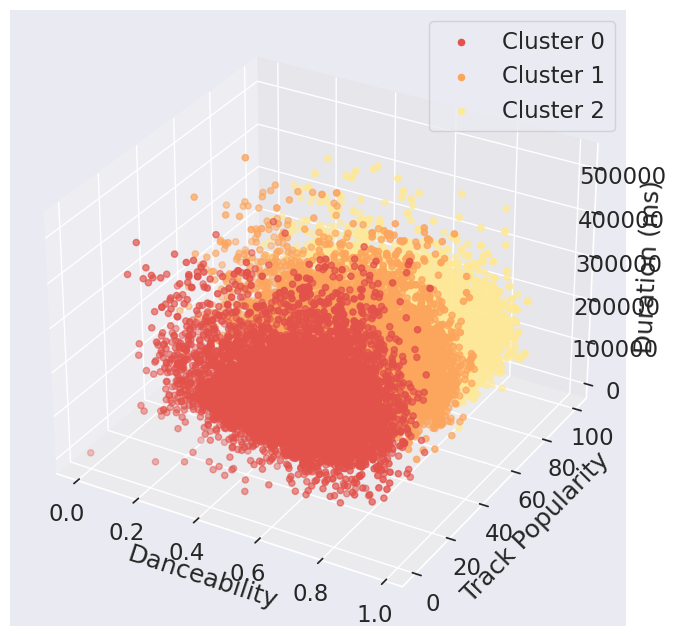

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
data = y

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate data points by cluster label and plot them with different colors
for cluster_label in set(data['cluster']):
    cluster_data = data[data['cluster'] == cluster_label]
    ax.scatter(cluster_data['danceability'], cluster_data['track_popularity'], cluster_data['duration_ms'], label=f'Cluster {cluster_label}')

ax.set_xlabel('Danceability')
ax.set_ylabel('Track Popularity')
ax.set_zlabel('Duration (ms)')

plt.legend()
plt.show()


# **Considering all variables**

In [39]:
df1 = df.copy()

In [40]:
df1

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [43]:
df1 = df1.select_dtypes(exclude=['object'])

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32833 non-null  int64  
 1   danceability      32833 non-null  float64
 2   energy            32833 non-null  float64
 3   key               32833 non-null  int64  
 4   loudness          32833 non-null  float64
 5   mode              32833 non-null  int64  
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
 12  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 3.3 MB


In [49]:
df1.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [46]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    #init="k-means++": selects initial cluster centroids using sampling based on an empirical probability distribution of the points
    #centroids are selected where there are more points
    #One can use "random" initialization as well
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

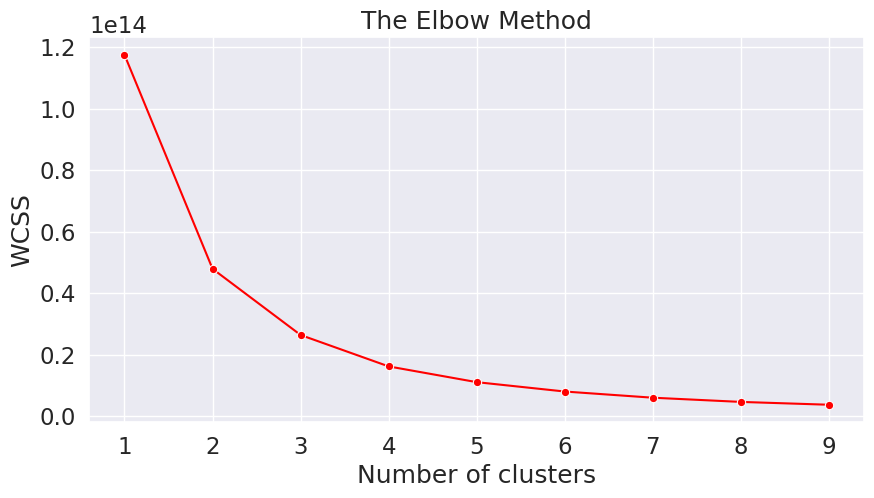

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 10), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
# using only Age and income variable for easy visualisation
min_scal = MinMaxScaler()
X_scaled4 = min_scal.fit_transform(df1)
X_scaled24 = pd.DataFrame(X_scaled4)

# Fitting K-Means to the dataset
kmeans_scaled = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

#init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia
#kmeans_scaled = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init=1)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled4)

In [52]:
labels_scaled = kmeans_scaled.labels_ # for each data point the assigned cluster (cluster number varies from 0 to 4)
centroids_scaled = kmeans_scaled.cluster_centers_ #Position of each centroid

In [53]:
df1['cluster']=labels_scaled
df1

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,66,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2
1,67,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2
2,70,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,1
3,60,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2
4,69,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,0
32829,20,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,0
32830,14,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,1
32831,15,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,0


In [54]:
print(labels_scaled)

[2 2 1 ... 1 0 1]


In [57]:
df1['cluster'].value_counts()

1    14259
2     9934
0     8640
Name: cluster, dtype: int64